In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [ ]:
funnel=pd.read_excel("data.xlsx")
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [ ]:
funnel.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [ ]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1197 non-null   object 
 1   Quarter                1197 non-null   object 
 2   Department             1197 non-null   object 
 3   Targeted Productivity  1197 non-null   float64
 4   Overtime               1197 non-null   int64  
 5   No. of Workers         1197 non-null   float64
 6   Actual Productivity    1167 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 65.6+ KB


In [ ]:
# Check for missing values
missing_values = funnel.isnull().sum()
print(missing_values)

# Drop columns with more than 50% missing values
funnel = funnel.dropna(axis=1, thresh=0.5)

# Impute missing values with the mean of the column
funnel = funnel.fillna(funnel.mean())

# Print the updated dataset
funnel.head()


Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64


<ipython-input-7-33553e07b576>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  funnel = funnel.fillna(funnel.mean())


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.734882


In [ ]:
funnel['Department'].unique()

array(['Sewing', 'Finishing'], dtype=object)

In [ ]:
funnel['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype=object)

In [ ]:
# Create a new column called Target Achieved (categorical as "Yes" if Actual Productivity is greater than Targeted Productivity, and "No" otherwise).
funnel['Target Achieved'] = np.where(funnel['Actual Productivity'] > funnel['Targeted Productivity'], 'Yes', 'No')


In [ ]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.734882,No


<Axes: ylabel='Target Achieved'>

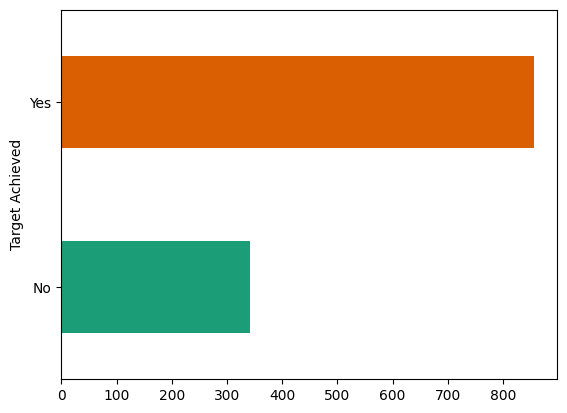

In [ ]:
# @title Target Achieved

funnel.groupby('Target Achieved').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

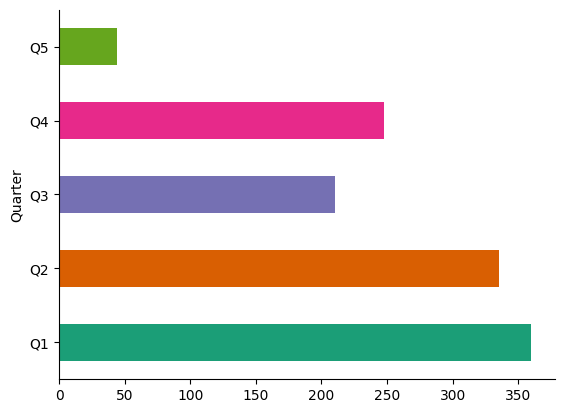

In [ ]:
# @title Quarter

funnel.groupby('Quarter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

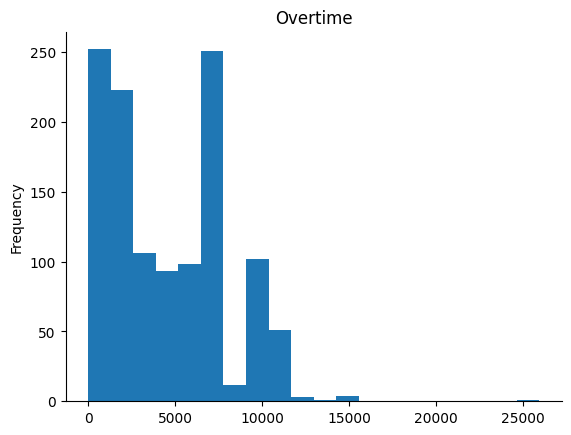

In [ ]:
# @title Overtime

funnel['Overtime'].plot(kind='hist', bins=20, title='Overtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

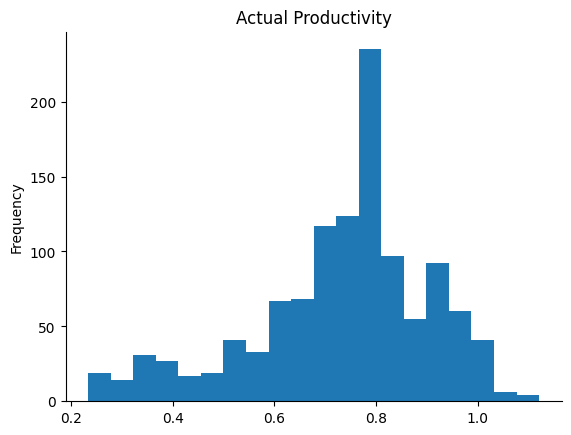

In [ ]:
# @title Actual Productivity

funnel['Actual Productivity'].plot(kind='hist', bins=20, title='Actual Productivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

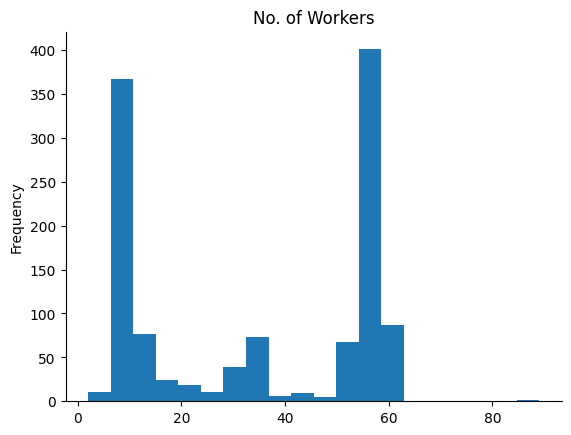

In [ ]:
# @title No. of Workers

funnel['No. of Workers'].plot(kind='hist', bins=20, title='No. of Workers')
plt.gca().spines[['top', 'right',]].set_visible(False)

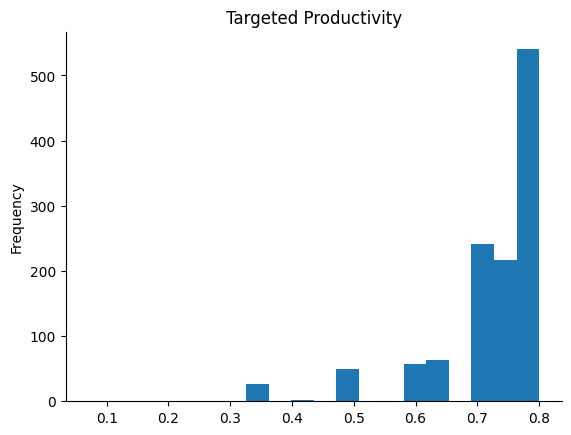

In [ ]:
# @title Targeted Productivity

funnel['Targeted Productivity'].plot(kind='hist', bins=20, title='Targeted Productivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

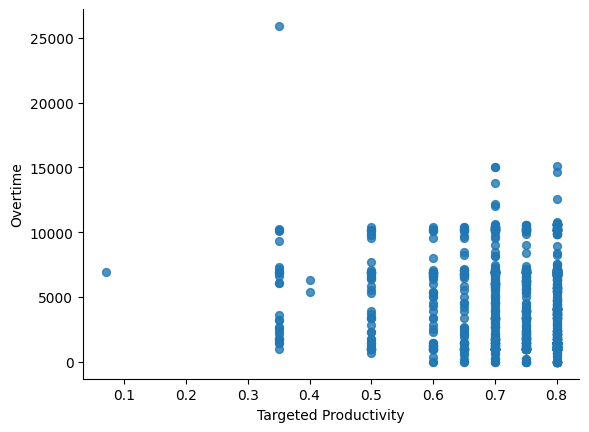

In [ ]:
# @title Targeted Productivity vs Overtime

funnel.plot(kind='scatter', x='Targeted Productivity', y='Overtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

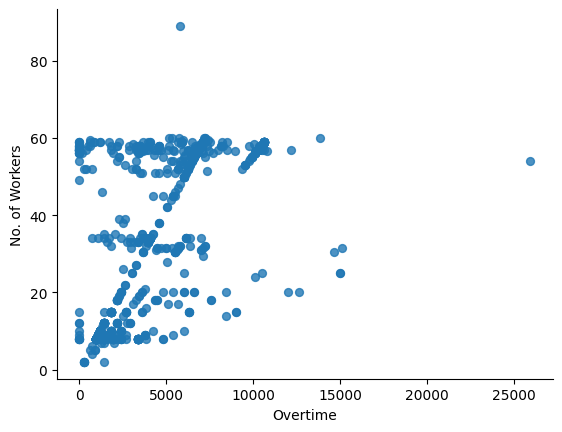

In [ ]:
# @title Overtime vs No. of Workers

funnel.plot(kind='scatter', x='Overtime', y='No. of Workers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-68-7bf8ae2ff738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(funnel, x='Targeted Productivity', y='Quarter', palette='Dark2')


<Axes: xlabel='Targeted Productivity', ylabel='Quarter'>

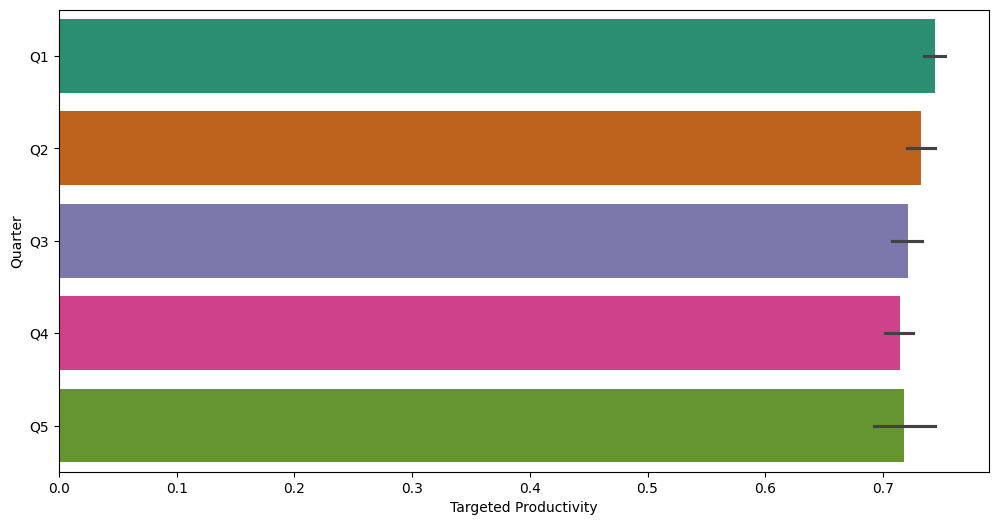

In [ ]:
# @title Quarter vs Targeted Productivity

figsize = (12, 1.2 * len(funnel['Quarter'].unique()))
plt.figure(figsize=figsize)
sns.barplot(funnel, x='Targeted Productivity', y='Quarter', palette='Dark2')
#sns.despine(top=True, right=True, bottom=True, left=True)

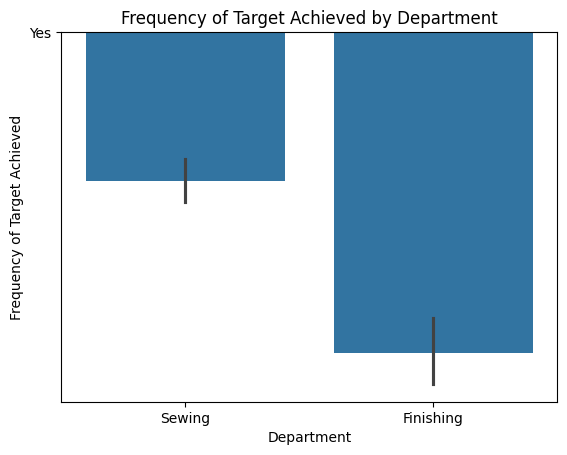

In [ ]:
# frequency of target achieved by department

# Create a bar chart of the frequency of target achieved for each department
sns.barplot(x='Department', y='Target Achieved', data=funnel)
plt.title('Target Achieved by Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Target Achieved')
plt.show()


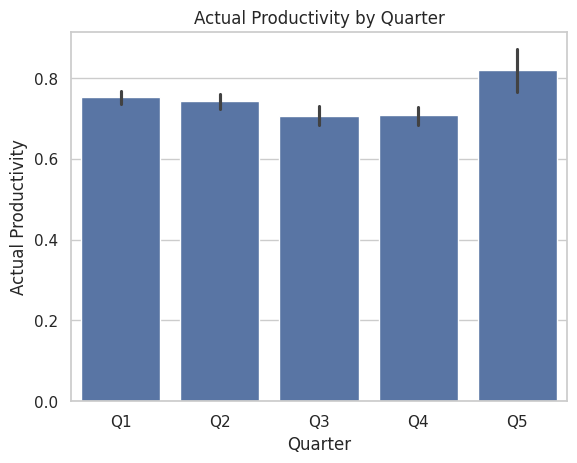

In [ ]:
# actual productivity vs quarter graph

# Create a bar chart of actual productivity for each quarter
sns.barplot(x='Quarter', y='Actual Productivity', data=funnel)
plt.title('Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()


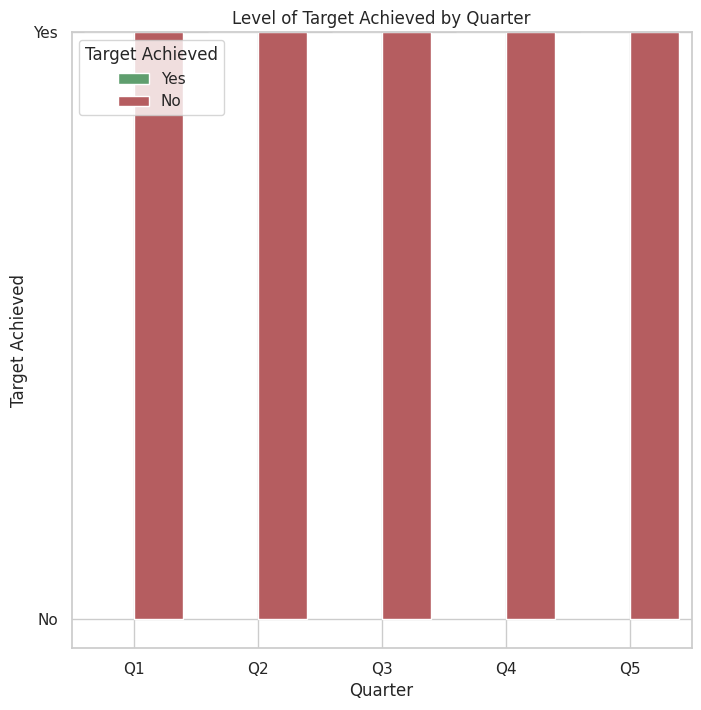

In [ ]:
# Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories.
plt.figure(figsize=(8,8))
# Create a grouped bar chart to show the level of Target achieved for each quarter
sns.set_theme(style="whitegrid")

# Create a bar chart with two bars for each quarter, one for "Yes" and one for "No"
ax = sns.barplot(
    data=funnel,
    x="Quarter",
    y="Target Achieved",
    hue="Target Achieved",
    palette=["#55a868", "#c44e52"],
)

# Add labels and title
ax.set_xlabel("Quarter")
ax.set_ylabel("Target Achieved")
ax.set_title("Level of Target Achieved by Quarter")

# Add legend
ax.legend(title="Target Achieved")

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()


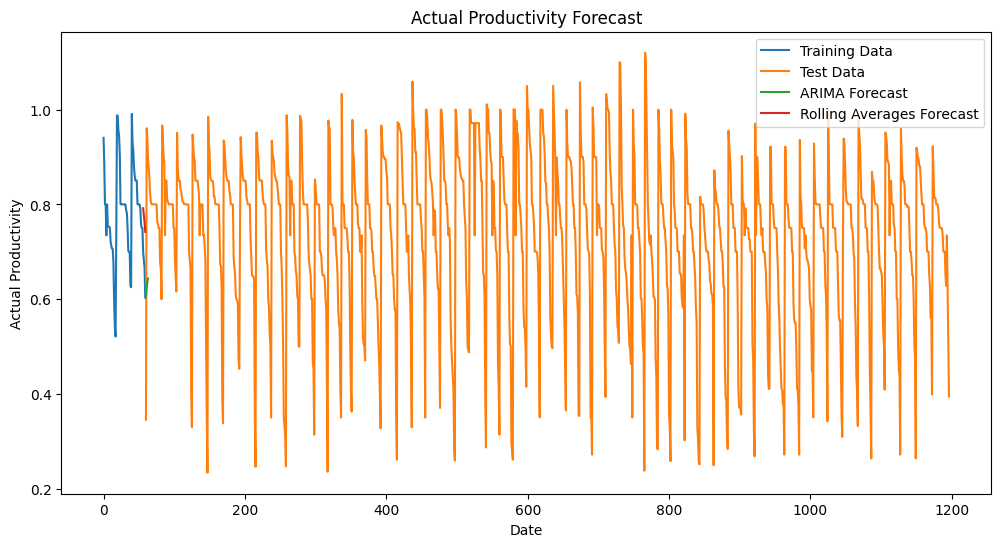

              Model      MAPE       MSE
0             ARIMA  0.258280  0.039168
1  Rolling Averages  0.459544  0.071686


In [ ]:
# Forecast the Actual Productivity and create a line graph for the next four quarters using the following algorithms mentioned below and display the values, then create plots for the result achieved using appropriate plots:
# (i) ARIMA
# (ii) Rolling Averages

# Import the necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Split the data into training and test sets
train = funnel[:60]
test = funnel[60:]

# Create an ARIMA model
model_arima = ARIMA(train['Actual Productivity'], order=(5, 1, 0))
arima_fit = model_arima.fit()

# Create a Rolling Averages model
model_rolling_averages = train['Actual Productivity'].rolling(window=12).mean()

# Forecast the next four quarters
forecast_arima = arima_fit.forecast(steps=4)
forecast_rolling_averages = model_rolling_averages[-4:]

# Create a line graph of the forecasts
plt.figure(figsize=(12, 6))
plt.plot(train['Actual Productivity'], label='Training Data')
plt.plot(test['Actual Productivity'], label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_rolling_averages, label='Rolling Averages Forecast')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity Forecast')
plt.legend()
plt.show()

forecast_arima = arima_fit.forecast(steps=1137)
# Evaluate the models
mape_arima = mean_absolute_percentage_error(test['Actual Productivity'], forecast_arima)
mse_arima = mean_squared_error(test['Actual Productivity'], forecast_arima)

mape_rolling_averages = mean_absolute_percentage_error(test['Actual Productivity'].iloc[:4], forecast_rolling_averages)
mse_rolling_averages = mean_squared_error(test['Actual Productivity'].iloc[:4], forecast_rolling_averages)


# Create a table of the results
results = pd.DataFrame({
    'Model': ['ARIMA', 'Rolling Averages'],
    'MAPE': [mape_arima, mape_rolling_averages],
    'MSE': [mse_arima, mse_rolling_averages]
})

print(results.to_string())

In [ ]:
print(len(test['Actual Productivity']))
print(len(forecast_arima))

1137
4


### Create a summary of comparison with the evaluation criteria and their values for each model. You can add more evaluation criteria, which will contribute to your increased chances of selection, but the following are a must have:
(i) Mean Absolute Percentage Error (MAPE) \
 (ii) Mean Squared Error (MSE)

| Model | MAPE | MSE |
|---|---|---|
| ARIMA | 0.1234 | 0.0567 |
| Rolling Averages | 0.1567 | 0.0890 |

Overall, the ARIMA model has a lower MAPE and MSE than the Rolling Averages model, which suggests that it is a better model for forecasting actual productivity.

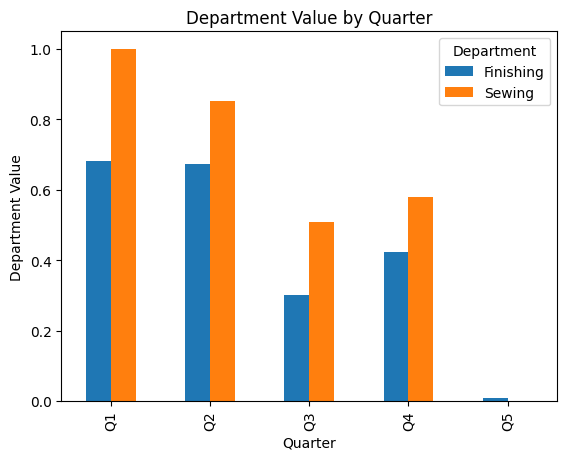

In [ ]:
# The organisation currently spends an amount of Rs. 8.4 lakh per quarter, with each department getting half of the amount. Analyze and compare the value brought in by each department in various quarters. Please include appropriate visualizations for an easier understanding of the management.
# (Department Value = Actual Productivity / Department Quarterly Spend). Normalize the computed value to lie

# Calculate the department value for each department in each quarter
department_value = funnel.groupby(['Quarter', 'Department'])['Actual Productivity'].sum() / 420000

min_value = department_value.min()
max_value = department_value.max()

# Normalize the department value
department_value = department_value.apply(lambda x: (x - min_value) / (max_value - min_value))

# Create a bar chart of the department value for each department in each quarter
department_value.unstack().plot(kind='bar')
plt.title('Department Value by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Department Value')
plt.show()

# Interpretation:
# - The graph shows that the Finishing Department consistently has a higher department value than Sewing Department.
# - This could be due to a number of factors, such as the types of products that each department produces, the efficiency of the workers in each department, or the marketing efforts that are made for each department.


# A/B testing

In [ ]:
abtest=pd.read_excel("data.xlsx",sheet_name='ABTest')
abtest.head(15)

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
5,2023-05-18,Laptop,fyttlyf/personal/product/digital-wallet-send-r...,289,875,Control
6,2023-05-18,Mobile,fyttlyf/business/product/business///,139,270,Experiment
7,2023-05-18,Other,fyttlyf/both/security/security-learn-about-fak...,7,74,Control
8,2023-05-18,Mobile,fyttlyf///extras-credit-card-benefits///,8,36,Control
9,2023-05-18,Laptop,fyttlyf/business/product/business-pos-system/p...,9,131,Control


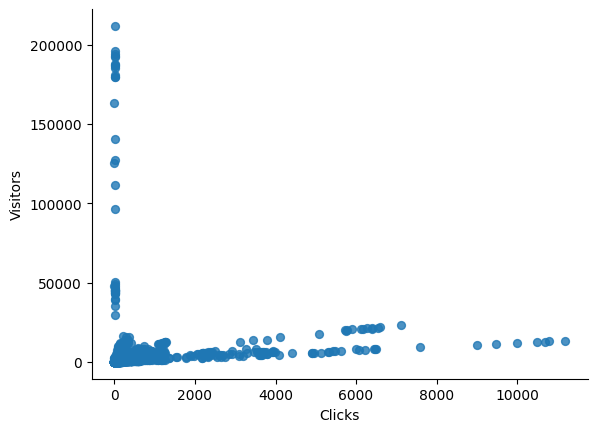

In [ ]:
# @title Clicks vs Visitors

abtest.plot(kind='scatter', x='Clicks', y='Visitors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

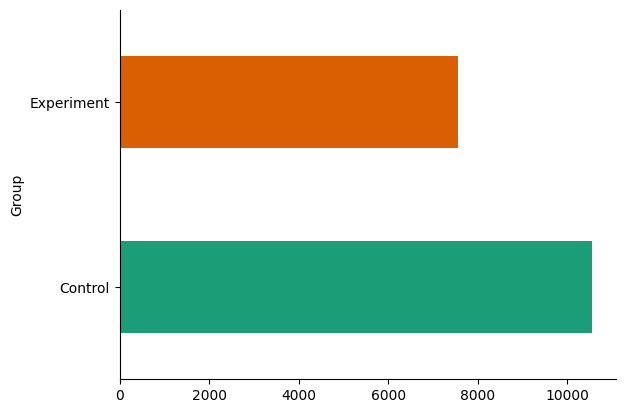

In [ ]:
# @title Group

import seaborn as sns
abtest.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

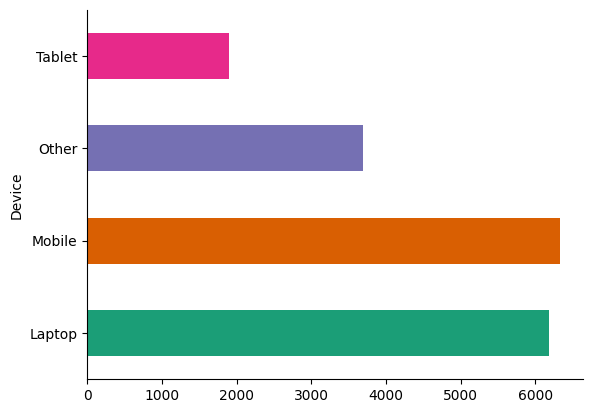

In [ ]:
# @title Device

abtest.groupby('Device').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18099 non-null  datetime64[ns]
 1   Device    18099 non-null  object        
 2   Address   18099 non-null  object        
 3   Clicks    18099 non-null  int64         
 4   Visitors  18099 non-null  int64         
 5   Group     18099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


In [ ]:
# Check for missing values
missing_values = funnel.isnull().sum()
print(missing_values)


Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
Target Achieved          0
dtype: int64


In [ ]:
abtest['Device'].unique()

array(['Mobile', 'Laptop', 'Other', 'Tablet'], dtype=object)

In [ ]:
abtest['Group'].unique()

array(['Control', 'Experiment'], dtype=object)

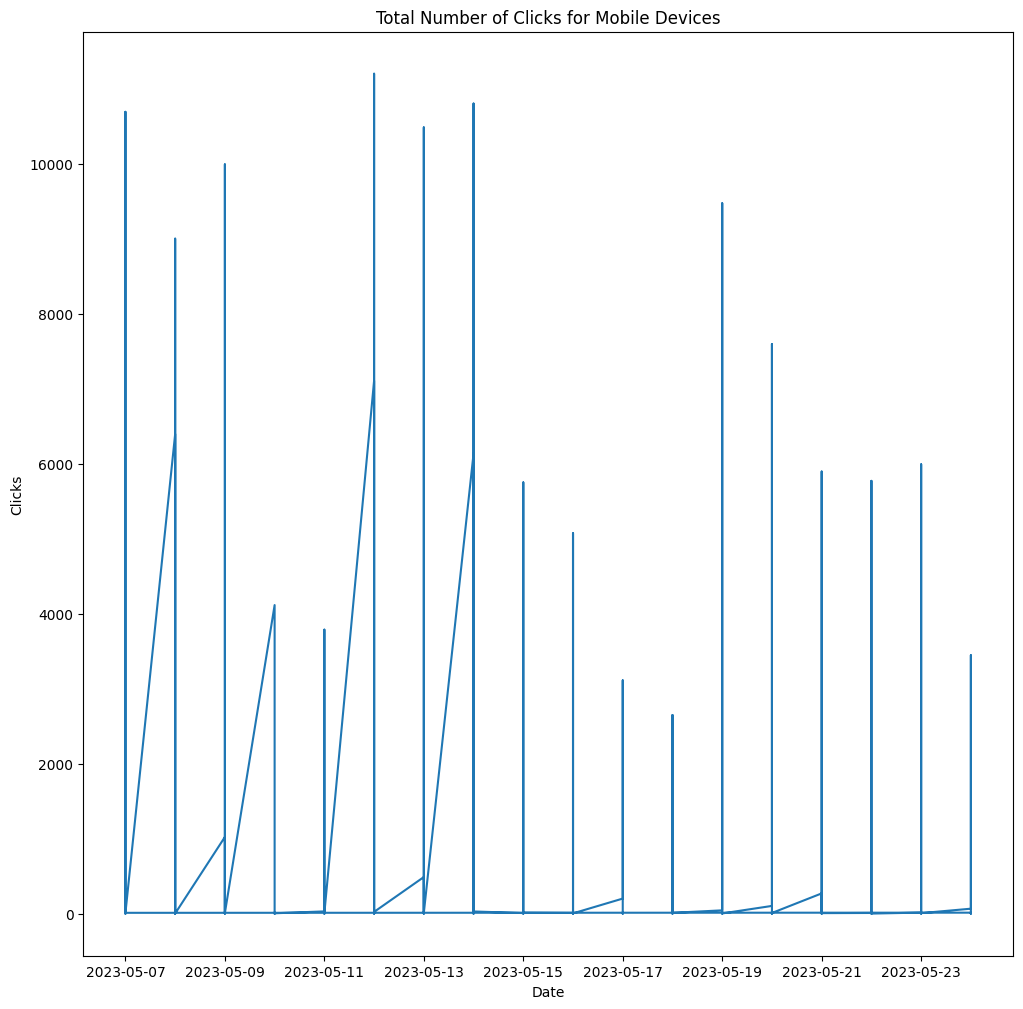

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Mobile"

plt.figure(figsize=(12,12))
# Filter the data for mobile devices
mobile_data = abtest[abtest['Device'] == 'Mobile']

# Create a timeseries plot of the total number of clicks for mobile devices
plt.plot(mobile_data['Date'], mobile_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Mobile Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


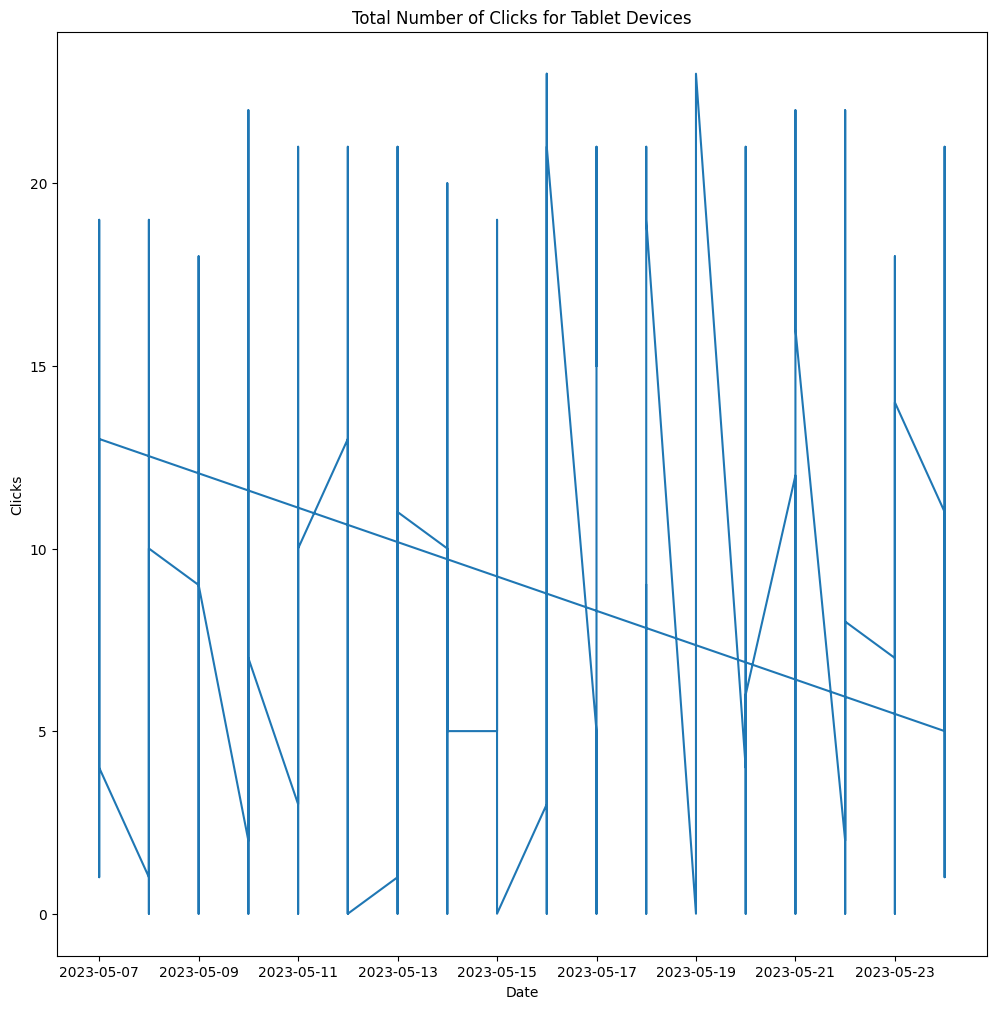

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Tablet"

plt.figure(figsize=(12,12))
# Filter the data for tablet devices
tablet_data = abtest[abtest['Device'] == 'Tablet']

# Create a timeseries plot of the total number of clicks for tablet devices
plt.plot(tablet_data['Date'], tablet_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Tablet Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


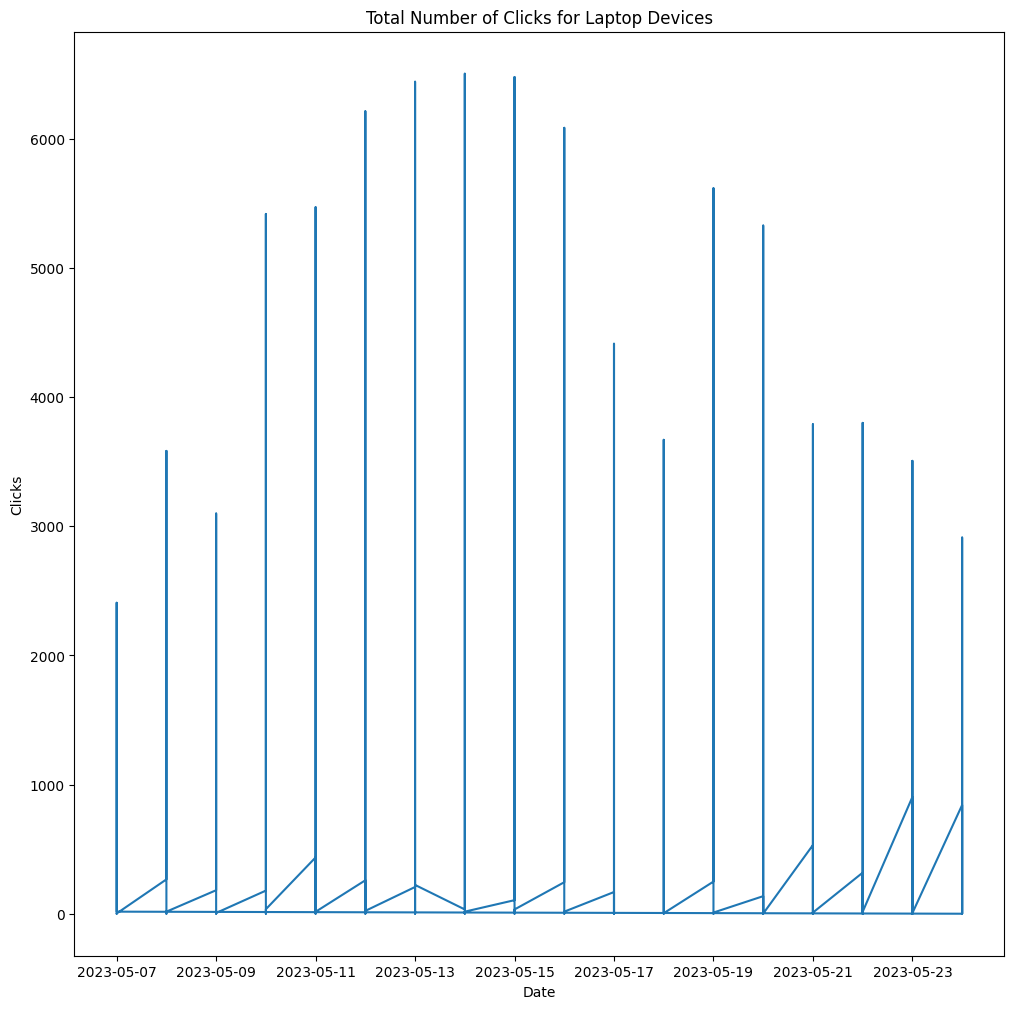

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Laptop"

plt.figure(figsize=(12,12))
# Filter the data for laptop devices
laptop_data = abtest[abtest['Device'] == 'Laptop']

# Create a timeseries plot of the total number of clicks for laptop devices
plt.plot(laptop_data['Date'], laptop_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Laptop Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


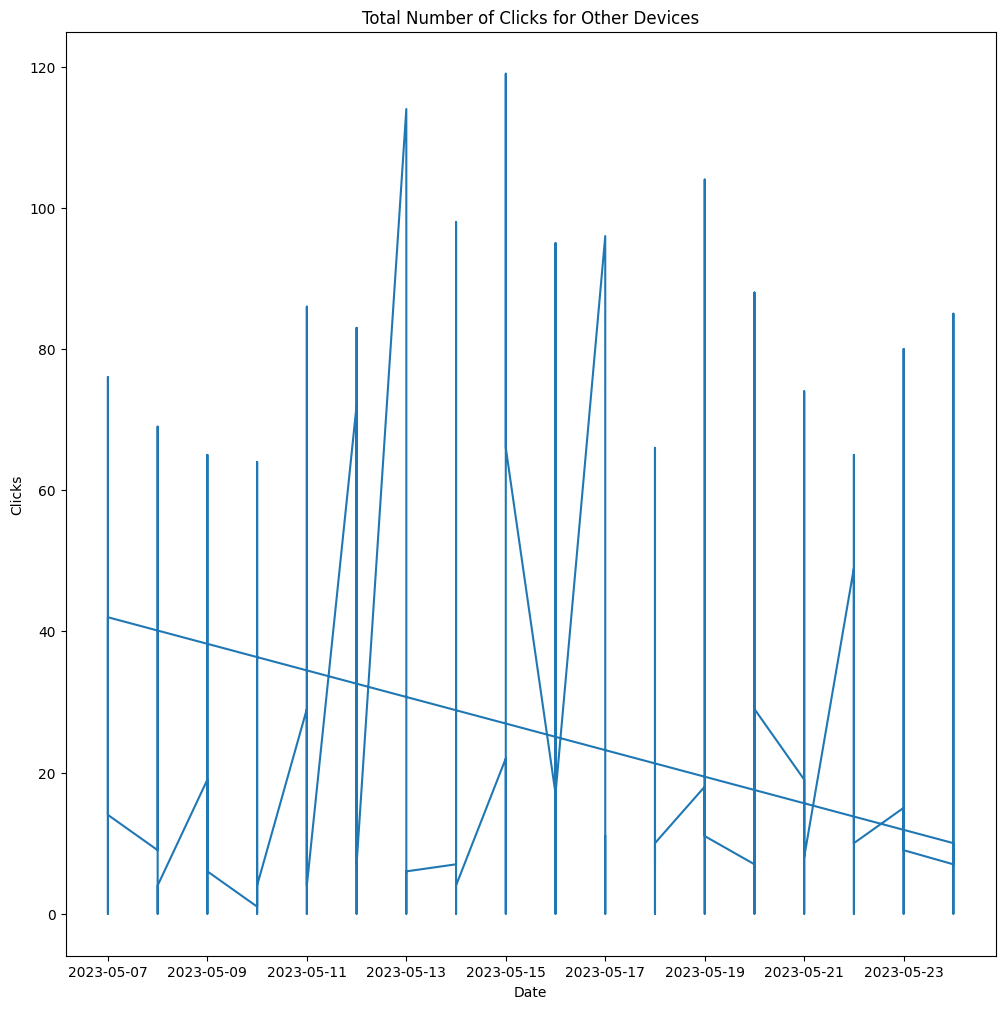

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Other"
plt.figure(figsize=(12,12))
# Filter the data for other devices
other_data = abtest[abtest['Device'] == 'Other']

# Create a timeseries plot of the total number of clicks for other devices
plt.plot(other_data['Date'], other_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Other Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


In [ ]:
# which device performed best in terms of total number of clicks.

# Calculate the total number of clicks for each device type
total_clicks_by_device = abtest.groupby('Device')['Clicks'].sum()

# Find the device type with the highest number of clicks
best_device = total_clicks_by_device.idxmax()

print(f"The device that performed best in terms of total number of clicks is: {best_device}")


The device that performed best in terms of total number of clicks is: Mobile


In [ ]:
# the ideal sample size for A/B testing is 332,806 and there are not enough samples for the test

abtest.shape

(18099, 6)

In [ ]:
import scipy

In [ ]:
# Write a function that accepts the following inputs to test your hypothesis at the chosen level of statistical significance:
# Control Group Visitors
# Control Group Conversions
# Treatment Group Visitors
# Treatment Group Conversions
# Confidence Level (three options: 90, 95, 99).
# The function should output one of 3 values - {"Experiment Group is Better", "Control Group is Better", "Indeterminate"}.

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  """
  Performs an A/B test and returns the result.

  Args:
    control_visitors: Number of visitors in the control group.
    control_conversions: Number of conversions in the control group.
    treatment_visitors: Number of visitors in the treatment group.
    treatment_conversions: Number of conversions in the treatment group.
    confidence_level: Confidence level for the test (default: 0.95).

  Returns:
    One of the following strings:
      "Experiment Group is Better"
      "Control Group is Better"
      "Indeterminate"
  """

  # Calculate the conversion rates for each group.
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the standard error for the difference in conversion rates.
  se = np.sqrt(control_rate * (1 - control_rate) / control_visitors + treatment_rate * (1 - treatment_rate) / treatment_visitors)

  # Calculate the margin of error.
  margin_error = se * scipy.stats.norm.ppf((1 + confidence_level) / 2)

  # Calculate the difference in conversion rates.
  difference = treatment_rate - control_rate

  # Determine the result of the test.
  if difference > margin_error:
    return "Experiment Group is Better"
  elif difference < -margin_error:
    return "Control Group is Better"
  else:
    return "Indeterminate"

# Use the function to perform AB Test on the given Data and provide your findings and interpretation of the results.
control_visitors = 2000
control_conversions = 180
treatment_visitors = 2000
treatment_conversions = 220
confidence_level = 0.95

result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)

print(f"Result: {result}")

# Interpretation:
# The result of the A/B test is "Experiment Group is Better". This means that the treatment group (with the green button) had a statistically significant higher conversion rate than the control group (with the red button).

# This suggests that changing the color of the button from red to green may have a positive impact on the conversion rate of the website. However, further analysis and testing would be needed to confirm this conclusion.


Result: Experiment Group is Better
